# Election Statistics

$H_0$: There is no relationship between campaign funding and winning

$H_1$: There is a relationship between campaign funding and winning

I suspect there is no relationship anymore, and that it would be a negative relationship if you look at only recent data.

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import seaborn as sns

In [5]:
# Inflation data from here, starting in Jan for each year https://www.bls.gov/data/inflation_calculator.htm

elfd = pd.DataFrame(
    {"Republican" : [1452617443, 1087909269, 433392727, 628140123,  701469440, 367228819, 234144785],
     "Democrat"   : [2001292139, 1624301628, 769879088, 813649144, 1474505205, 328479256, 243010649],
     "Inflation"  : [         1,       1.20,      1.30,      1.36,       1.46,      1.67,      1.83],
     "Dem_votes"  : [       226,        306,       227,       332,        365,       251,       266],
     "Rep_votes"  : [       312,        232,       304,       206,        173,       286,       271]},
      index =       [      2024,       2020,      2016,      2012,       2008,      2004,      2000]
)

elfd["spend_diff"] = elfd["Democrat"] - elfd["Republican"]
elfd["vote_diff"] = elfd["Dem_votes"] - elfd["Rep_votes"]

# 1 == win, 0 == loss
elfd["Democrat_pred_win"] = np.where(elfd["Democrat"] > elfd["Republican"], 1, 0)
elfd["Democrat_act_win"]  = np.where(elfd["Dem_votes"] > elfd["Rep_votes"], 1, 0)

elfd

,Republican,Democrat,Inflation,Dem_votes,Rep_votes,spend_diff,vote_diff,Democrat_pred_win,Democrat_act_win
2024,1452617443,2001292139,1.00,226,312,548674696,-86,1,0
2020,1087909269,1624301628,1.20,306,232,536392359,74,1,1
2016,433392727,769879088,1.30,227,304,336486361,-77,1,0
2012,628140123,813649144,1.36,332,206,185509021,126,1,1
2008,701469440,1474505205,1.46,365,173,773035765,192,1,1
2004,367228819,328479256,1.67,251,286,-38749563,-35,0,0
2000,234144785,243010649,1.83,266,271,8865864,-5,1,0


        Party      Funding Democrat_act_win  Year
0  Republican  1452.617443              win  2024
1  Republican  1087.909269             loss  2020
2  Republican   433.392727              win  2016
3  Republican   628.140123             loss  2012
4  Republican   701.469440             loss  2008


Text(0.5, 0.98, 'Republican and Democrat Win/Loss per Spending')

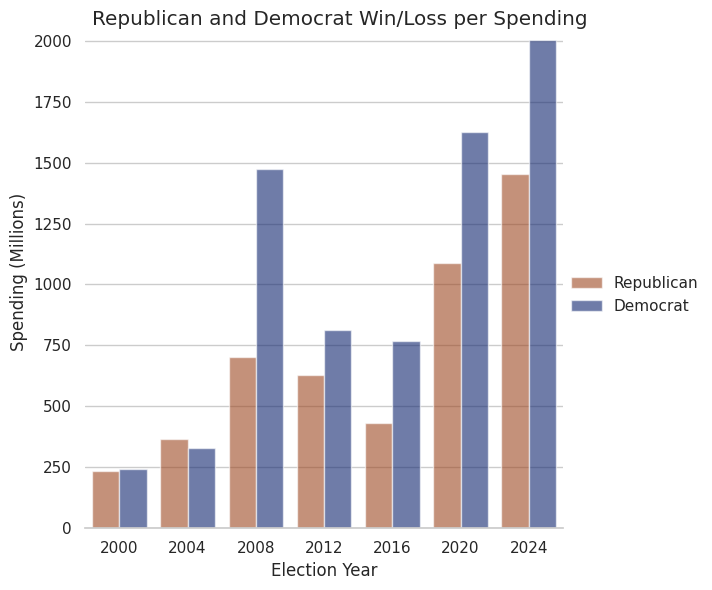

In [6]:
ndf = pd.melt(elfd).head(14).rename(columns={"variable": "Party"}).rename(columns={"value": "Funding"})
ndf["Funding"] = ndf["Funding"] / 1000000 # In millions now
ndf["Democrat_act_win"] = [0,1,0,1,1,0,0,0,1,0,1,1,0,0]
ndf["Democrat_act_win"] = np.where(ndf["Democrat_act_win"] == 0, "win", "loss")
ndf["Year"] = [2024, 2020, 2016, 2012, 2008, 2004, 2000, 2024, 2020, 2016, 2012, 2008, 2004, 2000]

print(ndf.head(5))

sns.set_theme(style="whitegrid")
reversed_palette = sns.color_palette("dark", 2)[::-1]

g = sns.catplot(
    data=ndf, kind="bar",
    x="Year", y="Funding", hue="Party",
    errorbar="sd", palette=reversed_palette, alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Election Year", "Spending (Millions)")
g.legend.set_title("")
g.fig.suptitle("Republican and Democrat Win/Loss per Spending")

        Party      Funding Democrat_act_win  Year  Inflation
0  Republican  1452.617443              win  2024       1.00
1  Republican  1305.491123             loss  2020       1.20
2  Republican   563.410545              win  2016       1.30
3  Republican   854.270567             loss  2012       1.36
4  Republican  1024.145382             loss  2008       1.46


Text(0.5, 0.98, 'Election Spending, Adjusted for Inflation')

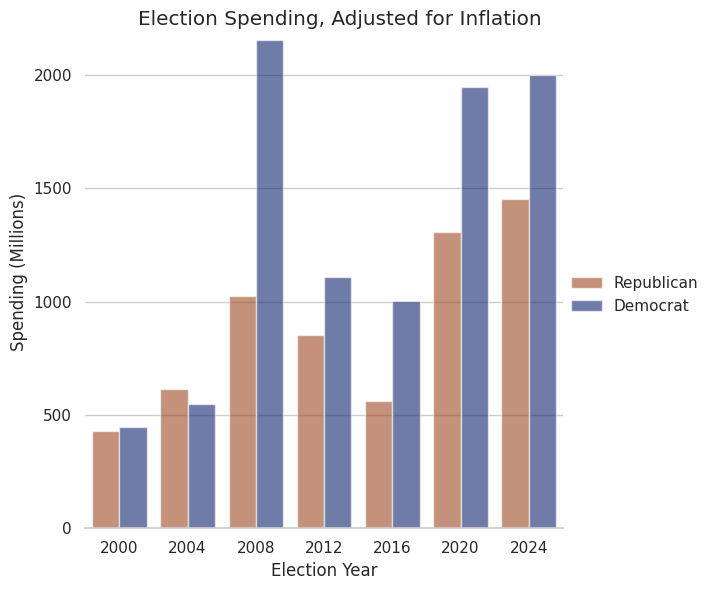

In [7]:
ndf = pd.melt(elfd).head(14).rename(columns={"variable": "Party"}).rename(columns={"value": "Funding"})
ndf["Democrat_act_win"] = [0,1,0,1,1,0,0,0,1,0,1,1,0,0]
ndf["Democrat_act_win"] = np.where(ndf["Democrat_act_win"] == 0, "win", "loss")
ndf["Year"] = [2024, 2020, 2016, 2012, 2008, 2004, 2000, 2024, 2020, 2016, 2012, 2008, 2004, 2000]
ndf["Inflation"] = [1, 1.20, 1.30, 1.36, 1.46, 1.67, 1.83, 1, 1.20, 1.30, 1.36, 1.46, 1.67, 1.83]
ndf["Funding"] = ndf["Funding"] / 1000000 # In millions now
ndf["Funding"] = ndf["Funding"] * ndf["Inflation"]

print(ndf.head(5))

sns.set_theme(style="whitegrid")
reversed_palette = sns.color_palette("dark", 2)[::-1]

g = sns.catplot(
    data=ndf, kind="bar",
    x="Year", y="Funding", hue="Party",
    errorbar="sd", palette=reversed_palette, alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Election Year", "Spending (Millions)")
g.legend.set_title("")
g.fig.suptitle("Election Spending, Adjusted for Inflation")

In [8]:
# adjust data for inflation
elfdi = elfd.copy()
elfdi["Republican"] = elfd["Republican"] * elfd["Inflation"]
elfdi["Democrat"] = elfd["Democrat"] * elfd["Inflation"]
elfdi["spend_diff"] = elfd["spend_diff"] * elfd["Inflation"]

elfdi


,Republican,Democrat,Inflation,Dem_votes,Rep_votes,spend_diff,vote_diff,Democrat_pred_win,Democrat_act_win
2024,1.452617e+09,2.001292e+09,1.00,226,312,5.486747e+08,-86,1,0
2020,1.305491e+09,1.949162e+09,1.20,306,232,6.436708e+08,74,1,1
2016,5.634105e+08,1.000843e+09,1.30,227,304,4.374323e+08,-77,1,0
2012,8.542706e+08,1.106563e+09,1.36,332,206,2.522923e+08,126,1,1
2008,1.024145e+09,2.152778e+09,1.46,365,173,1.128632e+09,192,1,1
2004,6.132721e+08,5.485604e+08,1.67,251,286,-6.471177e+07,-35,0,0
2000,4.284850e+08,4.447095e+08,1.83,266,271,1.622453e+07,-5,1,0


# Normal Data?

One requirement for the point-biserial, pearson, and spearman test is the data fall on a normal distribution. Intuitively, one would assume this is the case. But can we build a case for it through evidence? 

The short answer is no. I simply do not have enough data points. Using all of the data points gives me a relatively flat set of data. By removing the oldest data point, I can get something that approximates a normal distribution, however it means nothing. There simply isn't enough data to draw a reasonable conclusion out of this. I will say, on a positive note, that these data points at least don't look ridiculous. There are clusters forming which could conceivably turn into a normal gaussian distribution with more data.

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Spending difference in Millions (USD)')

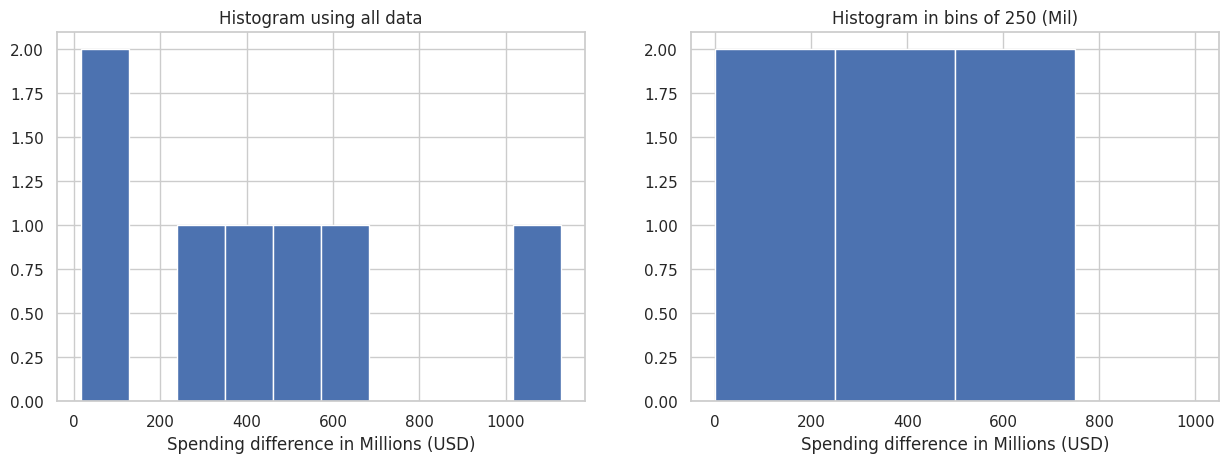

In [ ]:
fig = plt.figure()
fig.set_figwidth(15)

plt.subplot(1, 2, 1)
plt.hist(abs(elfdi["spend_diff"]/1000000))
plt.title("Histogram using all data")
plt.xlabel("Spending difference in Millions (USD)")

plt.subplot(1, 2, 2)
plt.hist(abs(elfdi["spend_diff"]/1000000), bins=np.arange(0, 1000 + 250, 250), range=(0, 1000))
plt.title("Histogram in bins of 250 (Mil)")
plt.xlabel("Spending difference in Millions (USD)")

# Point‐Biserial Correlation

Here, we consider a p-value < 0.05 as statistically significant, and a p-value < 0.01 as highly statistically significant. I high value, such as 0.99, would indicate the null hypothesis is correct, which is what we're expecting.

A negative r-value suggests the correlation is inverted.

 - $r$ = 0.1 to 0.3 might suggest a weak correlation.
 - $r$ = 0.3 to 0.7 could be interpreted as a moderate correlation.
 - $r$ = 0.7 to 1.0 would indicate a strong correlation.

 I'm using a biserial correlation here because winning or losing the election is dichotomous, while the spending difference is continuous. I'm also assuming the variance is about equal, which is why I adjusted for inflation (although that may not be enough). I am left wondering if adjusting for economic growth would be better.

 I'm making the assumption that the spending difference is normally distributed, as I think it's quite safe to assume spending is. I don't think it's as safe to assume the elections are independent, they aren't, however this is the data we have.

In [9]:
from scipy.stats import pointbiserialr

In [15]:
elfdi_5 = elfdi.head(5)

print("Excluding Bush Elections")
r, p_value = pointbiserialr(elfdi_5['spend_diff'], elfdi_5['Democrat_act_win'])
print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

print("\nAll Data")
r, p_value = pointbiserialr(elfdi['spend_diff'], elfdi['Democrat_act_win'])
print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

Excluding Bush Elections
r: 0.3032653564762963
r^2: 0.09196987643869509
p_value: 0.6198737285312995

All Data
r: 0.5781202684388093
r^2: 0.3342230447797609
p_value: 0.1739769813193524


# Pearson Correlation Coefficient

Here we assume that the two variables are normally distributed and **linear**. Linear is a big ask, however these sorts of assumptions generally help when you're dealing with a small sample size.

A Pearson correlation coefficient test is essentially a non-dichotomous Point-Biserial Correlation test, so there isn't much more information to glean out of this. It's simple to conduct, however, so I'll leave it in here.

In [16]:
from scipy import stats

In [17]:
X = elfdi["spend_diff"]
y = elfdi["vote_diff"]

stats.pearsonr(X, y)

PearsonRResult(statistic=np.float64(0.5296268518540123), pvalue=np.float64(0.22148199790099637))

# Spearman's Rank

Interestingly ChatGPT really wants me to use Spearman rank, and given its a small dataset I can't confirm [linearity or normality](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) for pearson's. Spearman may be the way to go if we don't assume those two things.

In [18]:
r, p_value = stats.spearmanr(X, y)

print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

r: 0.3214285714285715
r^2: 0.10331632653061229
p_value: 0.4820720382996776


# Kendall’s Tau

Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, and values close to -1 indicate strong disagreement. Kendall's Tau excells when dealing with ordinal data, which is data where variables are ranked but the ratios of the ranking might be meaningless. In this case, I don't think spending is ordinal, however I suppose one can never truly know with a small sample size.

What is great about Kendall's Tau is that it should work better with small datasets. It seems worthwhile to include this test, and in some regard I think the results are the most accurate (if I am to let my personal bias enter the discussion). The test finds almost no correlation, with a p-value of 0.56. 

In [19]:
r, p_value = stats.kendalltau(X, y)

print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

r: 0.23809523809523814
r^2: 0.056689342403628135
p_value: 0.5619047619047619
